In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
market=pd.read_csv('/content/marketing_AB.csv')

In [40]:
#EDA
market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


In [41]:
market.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [42]:
market.drop(columns=['Unnamed: 0'],inplace=True)

In [43]:
market.duplicated(subset=['user id']).any()

False

In [44]:
market.columns

Index(['user id', 'test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [45]:
df=['test group', 'converted','most ads day',
       'most ads hour']

In [46]:
for column in df:
  print(f'{column}:{market[column].unique()}')

test group:['ad' 'psa']
converted:[False  True]
most ads day:['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
most ads hour:[20 22 18 10 14 13 19 11 12 16 21  3 23  4  8  0  2 15  1  6 17  7  9  5]


In [47]:
#EDA-visualization
sns.set_palette('muted')
def plot_group(group,variable):
  g=sns.FacetGrid(market,col=group,margin_titles=True)
  g.map(sns.countplot,variable)
  g.add_legend()
  plt.xticks(rotation=90)

  plt.tight_layout()
  plt.show()

In [48]:
def plot_info(var):
  plt.figure(figsize=(5,5))
  sns.countplot(data=market,x=var)
  plt.xticks(rotation=90)
  plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


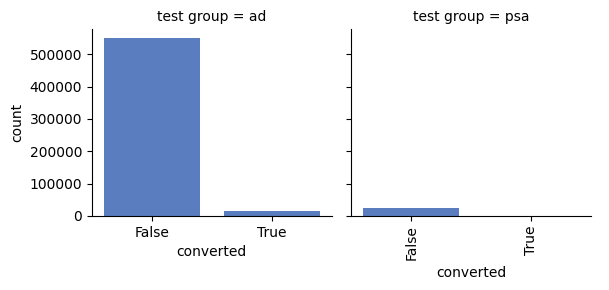

In [49]:
plot_group('test group','converted')

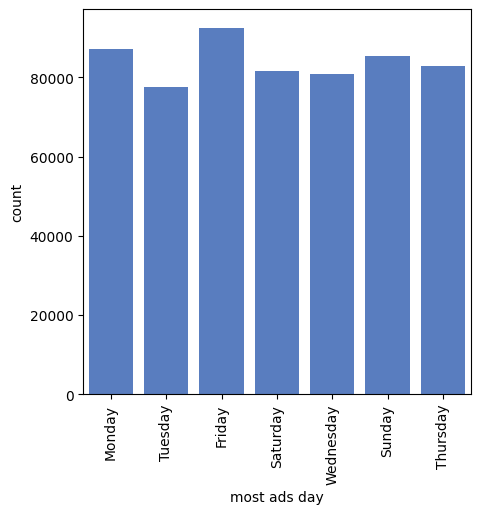

In [50]:
plot_info('most ads day')

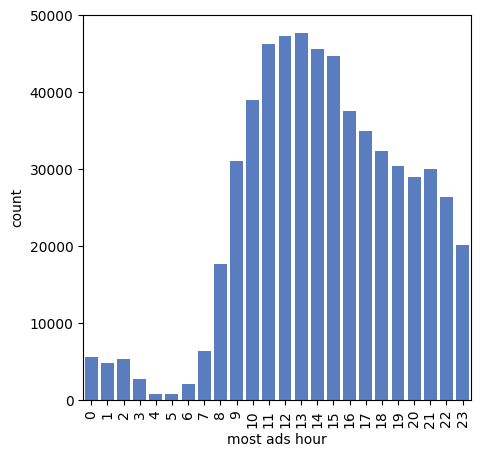

In [51]:
plot_info('most ads hour')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


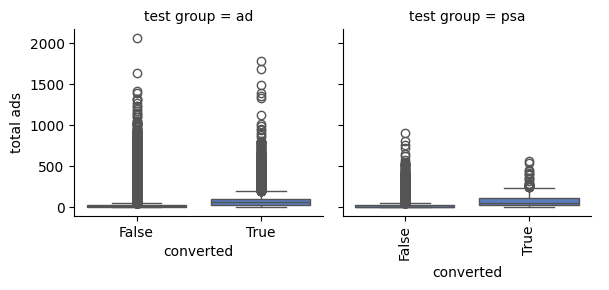

In [52]:
g=sns.FacetGrid(market,col='test group',margin_titles=True)
g.map(sns.boxplot,'converted','total ads')
g.add_legend()
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [53]:
market['total ads'].describe()

count    588101.000000
mean         24.820876
std          43.715181
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
max        2065.000000
Name: total ads, dtype: float64

In [54]:
#EDA-Bivariate Analysis
ct1=pd.crosstab(market['test group'],market['converted'],normalize='index')
ct1


converted,False,True
test group,,
ad,0.974453,0.025547
psa,0.982146,0.017854


In [55]:
ct2=pd.crosstab(market['most ads day'],market['converted'],normalize='index')
ct2

converted,False,True
most ads day,,
Friday,0.977788,0.022212
Monday,0.967188,0.032812
Saturday,0.978949,0.021051
Sunday,0.975524,0.024476
Thursday,0.978429,0.021571
Tuesday,0.970160,0.029840
Wednesday,0.975058,0.024942


In [56]:
#chi2 for category features
from scipy.stats import chi2_contingency
for col in market.columns:
  if col not in  ['test group','user id','total ads']:
    ct=pd.crosstab(market[col],market['test group'])
    chi2,p,_,_=chi2_contingency(ct)
    print(f'chi2_test for [{col}]:')
    print(f'chi2 value:{chi2}')
    print(f'p value:{p}')
    if p< 0.05:
      print(f'[{col}] is statistically significant\n')
    else:
      print(f'[{col}] is not significant\n')

chi2_test for [converted]:
chi2 value:54.005823883685245
p value:1.9989623063390075e-13
[converted] is statistically significant

chi2_test for [most ads day]:
chi2 value:235.61445227291117
p value:4.849067664297987e-48
[most ads day] is statistically significant

chi2_test for [most ads hour]:
chi2 value:192.29173193613582
p value:1.094573971081402e-28
[most ads hour] is statistically significant



In [69]:
#continues
from scipy.stats import shapiro,levene,ttest_ind,mannwhitneyu
#normality assumption
control,control_p=shapiro(market[market['test group']=='psa']['total ads'])
treatment,treatment_p=shapiro(market[market['test group']=='ad']['total ads'])
if control_p>0.05:
  print(f'control group(p value):{control_p}\nthis group is normally distributed ')
else:
  print(f'control group(p value):{control_p}\nthis group is not normally distributed ')
if treatment_p>0.05:
  print(f'treatment group(p value):{treatment_p}\nthis group is normally distributed ')
else:
  print(f'control group(p value):{control_p}\nthis group is not normally distributed ')

control group(p value):0.0
this group is not normally distributed 
control group(p value):0.0
this group is not normally distributed 


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [70]:
#variances assumption
levene,levene_p=levene(market[market['test group']=='psa']['total ads'],market[market['test group']=='ad']['total ads'])
print(f'levene test for [total_ads](p value):{levene_p}')

levene test for [total_ads](p value):0.020628382759511198


In [73]:
#perform a test
if control_p>0.05 and treatment_p>0.05 and levene_p>0.05:
  #t_test
  ttest,test_p=ttest_ind(market[market['test group']=='psa']['total ads'],market[market['test group']=='ad']['total ads'])
  print(f't-test(p_value):{test_p}')
else:
  #Mann_WhitneyU test
  utest,test_p=mannwhitneyu(market[market['test group']=='psa']['total ads'],market[market['test group']=='ad']['total ads'])
  print(f'Utest(p_value):{test_p}')
if test_p<0.05:
  print(f'There is a significant difference between the groups')
else:
  print('There is no significant difference between the groups')

Utest(p_value):4.6909108547205694e-11
There is a significant difference between the groups
